# 仕事で目標立てる？

In [7]:
from bs4 import BeautifulSoup
import requests
import csv
import time

# 検索キーワード
keywords = ['職場の評価', '目標達成', 'やりがい']

# CSVファイルの準備
with open('scraped_data.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Keyword', 'URL', 'Content', 'Age', 'Gender'])  # ヘッダー

    # 各キーワードに対して検索とスクレイピング
    for keyword in keywords:
        # Amebaブログ内検索URL
        ameba_search_url = f"https://search.ameba.jp/search/entry/{keyword}.html?aid=blogname"

        # 検索結果ページの取得
        response = requests.get(ameba_search_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # 検索結果のリンクを取得
        links = soup.find_all('a')  # 適切なセレクターを使用してリンクを取得

        # 各リンクに対してスクレイピング
        for link in links:
            href = link.get('href')
            if href:  # リンクが存在する場合
                try:
                    # ページの内容を取得
                    page_response = requests.get(href)
                    page_soup = BeautifulSoup(page_response.text, 'html.parser')
                    content = page_soup.text  # 本文の取得

                    # 年齢、性別の取得（サイトに依存）
                    age = None
                    gender = None

                    # CSVに書き込み
                    writer.writerow([keyword, href, content, age, gender])
                    
                    # 10秒の間隔を設ける
                    time.sleep(10)
                except Exception as e:
                    print(f"An error occurred while processing {href}: {e}")
                    continue  # エラーが発生した場合、次のリンクに進む


An error occurred while processing /: Invalid URL '/': No scheme supplied. Perhaps you meant http:///?
An error occurred while processing /talent/職場の評価.html: Invalid URL '/talent/職場の評価.html': No scheme supplied. Perhaps you meant http:///talent/職場の評価.html?
An error occurred while processing /general/職場の評価.html: Invalid URL '/general/職場の評価.html': No scheme supplied. Perhaps you meant http:///general/職場の評価.html?
An error occurred while processing /news/職場の評価.html: Invalid URL '/news/職場の評価.html': No scheme supplied. Perhaps you meant http:///news/職場の評価.html?
An error occurred while processing /search/職場の評価.html: Invalid URL '/search/職場の評価.html': No scheme supplied. Perhaps you meant http:///search/職場の評価.html?
An error occurred while processing /search/職場の評価.html: Invalid URL '/search/職場の評価.html': No scheme supplied. Perhaps you meant http:///search/職場の評価.html?
An error occurred while processing /search/期末テスト.html: Invalid URL '/search/期末テスト.html': No scheme supplied. Perhaps you meant htt

In [13]:
print(data['Content'].head())

vectorizer = TfidfVectorizer(stop_words=None, min_df=2)
print(data['Content'].head(5))
tfidf_matrix = vectorizer.fit_transform(data['Content'])



Series([], Name: Content, dtype: object)
Series([], Name: Content, dtype: object)


ValueError: empty vocabulary; perhaps the documents only contain stop words

# データ分析

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# CSVファイルからデータを読み込む
file_path = 'scraped_data.csv' # ファイル名を正しいものに変更
data = pd.read_csv(file_path)

# 必要に応じて欠損値を処理する
data = data[data['Content'].notna()]


# 不要な文字などのクリーニング
# 例：URLやHTMLタグの削除
data['Content'] = data['Content'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


# TF-IDFでテキストデータを数値に変換
vectorizer = TfidfVectorizer(stop_words=None, min_df=2) # 最低2回以上出現する単語のみを考慮
tfidf_matrix = vectorizer.fit_transform(data['Content'])




# 必要に応じて他の前処理を追加
# ...

# 前処理が完了したデータを保存
processed_data = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
processed_data.to_csv('processed_data.csv', index=False)


# ヒストグラム表示

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


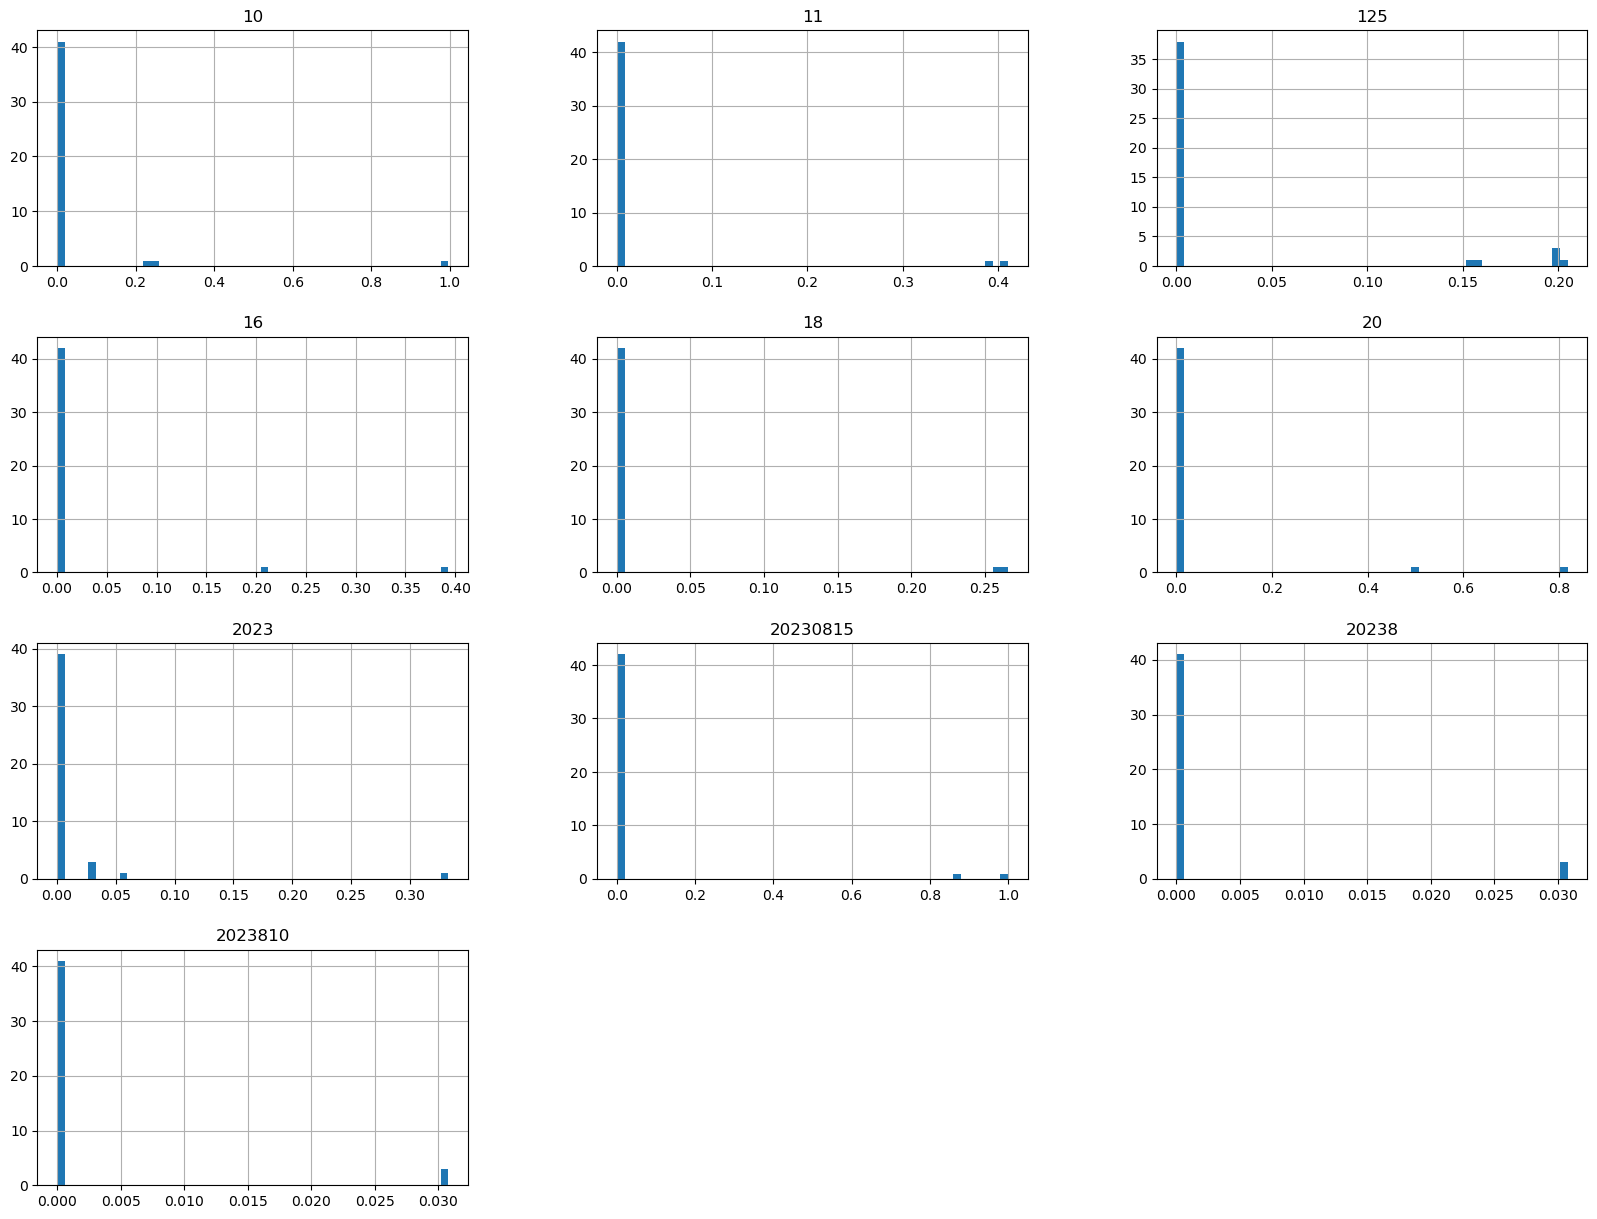

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 例: 最初の10個の特徴のヒストグラムをプロット
processed_data.iloc[:, :10].hist(bins=50, figsize=(20,15))
plt.show()


# トップワードパレート図

Total rows in CSV: 44
Processing row 0
Processing row 10
Processing row 20
Processing row 30
Processing row 40


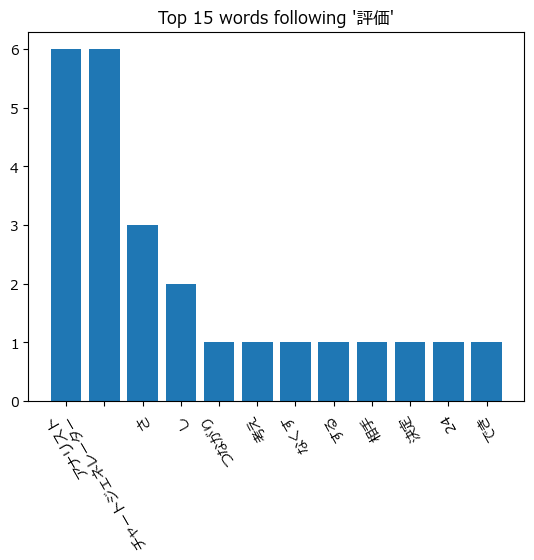

Processing row 0
Processing row 10
Processing row 20
Processing row 30
Processing row 40


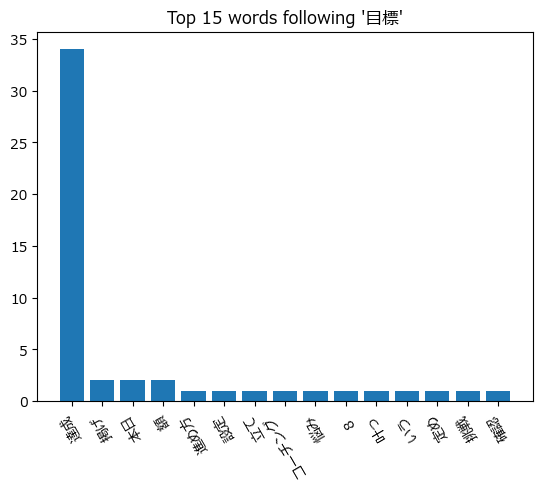

Processing row 0
Processing row 10
Processing row 20
Processing row 30
Processing row 40


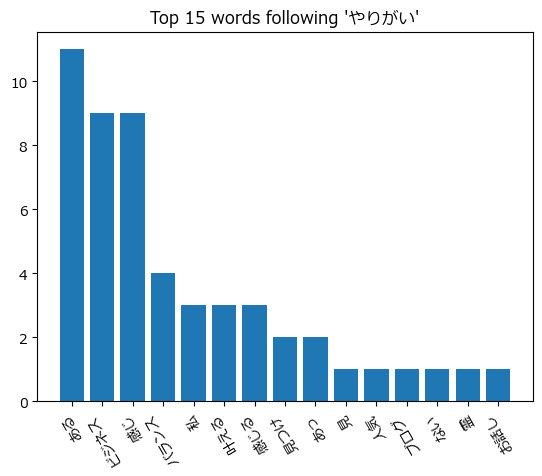

In [12]:
import MeCab
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Meiryo'
# Ubuntu用
# mpl.rcParams['font.family'] = 'IPAexGothic'

file_path = 'scraped_data.csv' # ファイル名を正しいものに変更
data = pd.read_csv(file_path)

# MeCabのインスタンスを作成
keywords = ['評価', '目標', 'やりがい']

mecab = MeCab.Tagger("-Ochasen")

# CSVの行数を表示
print(f"Total rows in CSV: {len(data)}")

# 各キーワードの後に続くワードをカウント
for keyword in keywords:
    following_words = []

    for index, content in enumerate(data['Content']):
        node = mecab.parseToNode(content)
        words = []
        while node:
            features = node.feature.split(',')
            # 名詞、動詞、形容詞のみを対象とする（助詞や接続詞などを除外）
            if features[0] in ['名詞', '動詞', '形容詞']:
                words.append(node.surface)
            node = node.next

        for i, word in enumerate(words):
            if word == keyword and i < len(words) - 1:
                next_word = words[i + 1]
                next_node = mecab.parseToNode(next_word)
                next_features = next_node.feature.split(',')
                if next_features[0] not in ['助詞', '助動詞', '記号']:
                    following_words.append(next_word)

        # 途中経過を表示（例：10行ごと）
        if index % 10 == 0:
            print(f"Processing row {index}")

    word_counts = Counter(following_words)


    # トップ15ワードを抽出
    top_15_words = word_counts.most_common(15)

    # 結果が存在する場合のみプロット
    if top_15_words:
        words, counts = zip(*top_15_words)
        plt.bar(words, counts)
        plt.title(f"Top 15 words following '{keyword}'")
        plt.xticks(rotation=3000)
        plt.show()
    else:
        print(f"No words found following '{keyword}'")


# 文脈を見る

In [13]:
for keyword in keywords:
    sentences_with_keyword = []

    for content in data['Content']:
        node = mecab.parseToNode(content)
        words = []
        while node:
            words.append(node.surface)
            node = node.next

        sentence = " ".join(words)
        if keyword in sentence:
            sentences_with_keyword.append(sentence)

    # キーワードを含むセンテンスの一部を表示
    print(f"Sentences with keyword '{keyword}':")
    for sentence in sentences_with_keyword[:5]:
        print(sentence)


Sentences with keyword '評価':
 サイバーエージェント が LLM 開発 に 踏み込む 理由 CyberAgent Way   1   2   3   4   5           Scroll   Topics トピックス プレス リリース 2023 年 8 月 18 日 AI Lab 、 推薦 システム 分野 の トップ カンファレンス 「 RecSys 2023 」 にて 主著 論文 採択 プレス リリース 2023 年 8 月 10 日 患者 と クリニック を つなぐ 、 パーソナル 美肌 治療 の オンライン 診療 プラットフォーム 「 TOIRO 美肌 院 」 を 開始 CyberAgent Way 2023 年 8 月 9 日 日本 の 生成 AI の 発展 まで 目指す サイバーエージェント が LLM 開発 に 踏み込む 理由 ニュース 一覧   特集 記事 一覧         Corporate 企業       News ニュース       Services サービス       Tech / Design 技術 ・ デザイン       Careers 採用       IR 投資 家 情報       Sustainability サステナビリティ       CyberAgent Way 公式 オウンドメディア             Sustainability サステナビリティ     Environment 環境     Society 社会     Governance ガバナンス       Services サービス     Media 主力 事業     AD 主力 事業     Game 主力 事業     Startup スタート アップ     AI 強化 分野     DX 強化 分野 ページ トップ へ   サイト マップ プライバシー ポリシー サイト ご 利用 規約 お 問い合わせ Abema 公式 ショップ           English Copyright © CyberAgent , Inc . 安全 へ の 取り組み   ESG データ SDGs へ の 取り組み サステナビリティニュース メニュー トップ CyberAgent Way 公式 オウンドメディア AL

# 久しぶりの共起ネットワーク

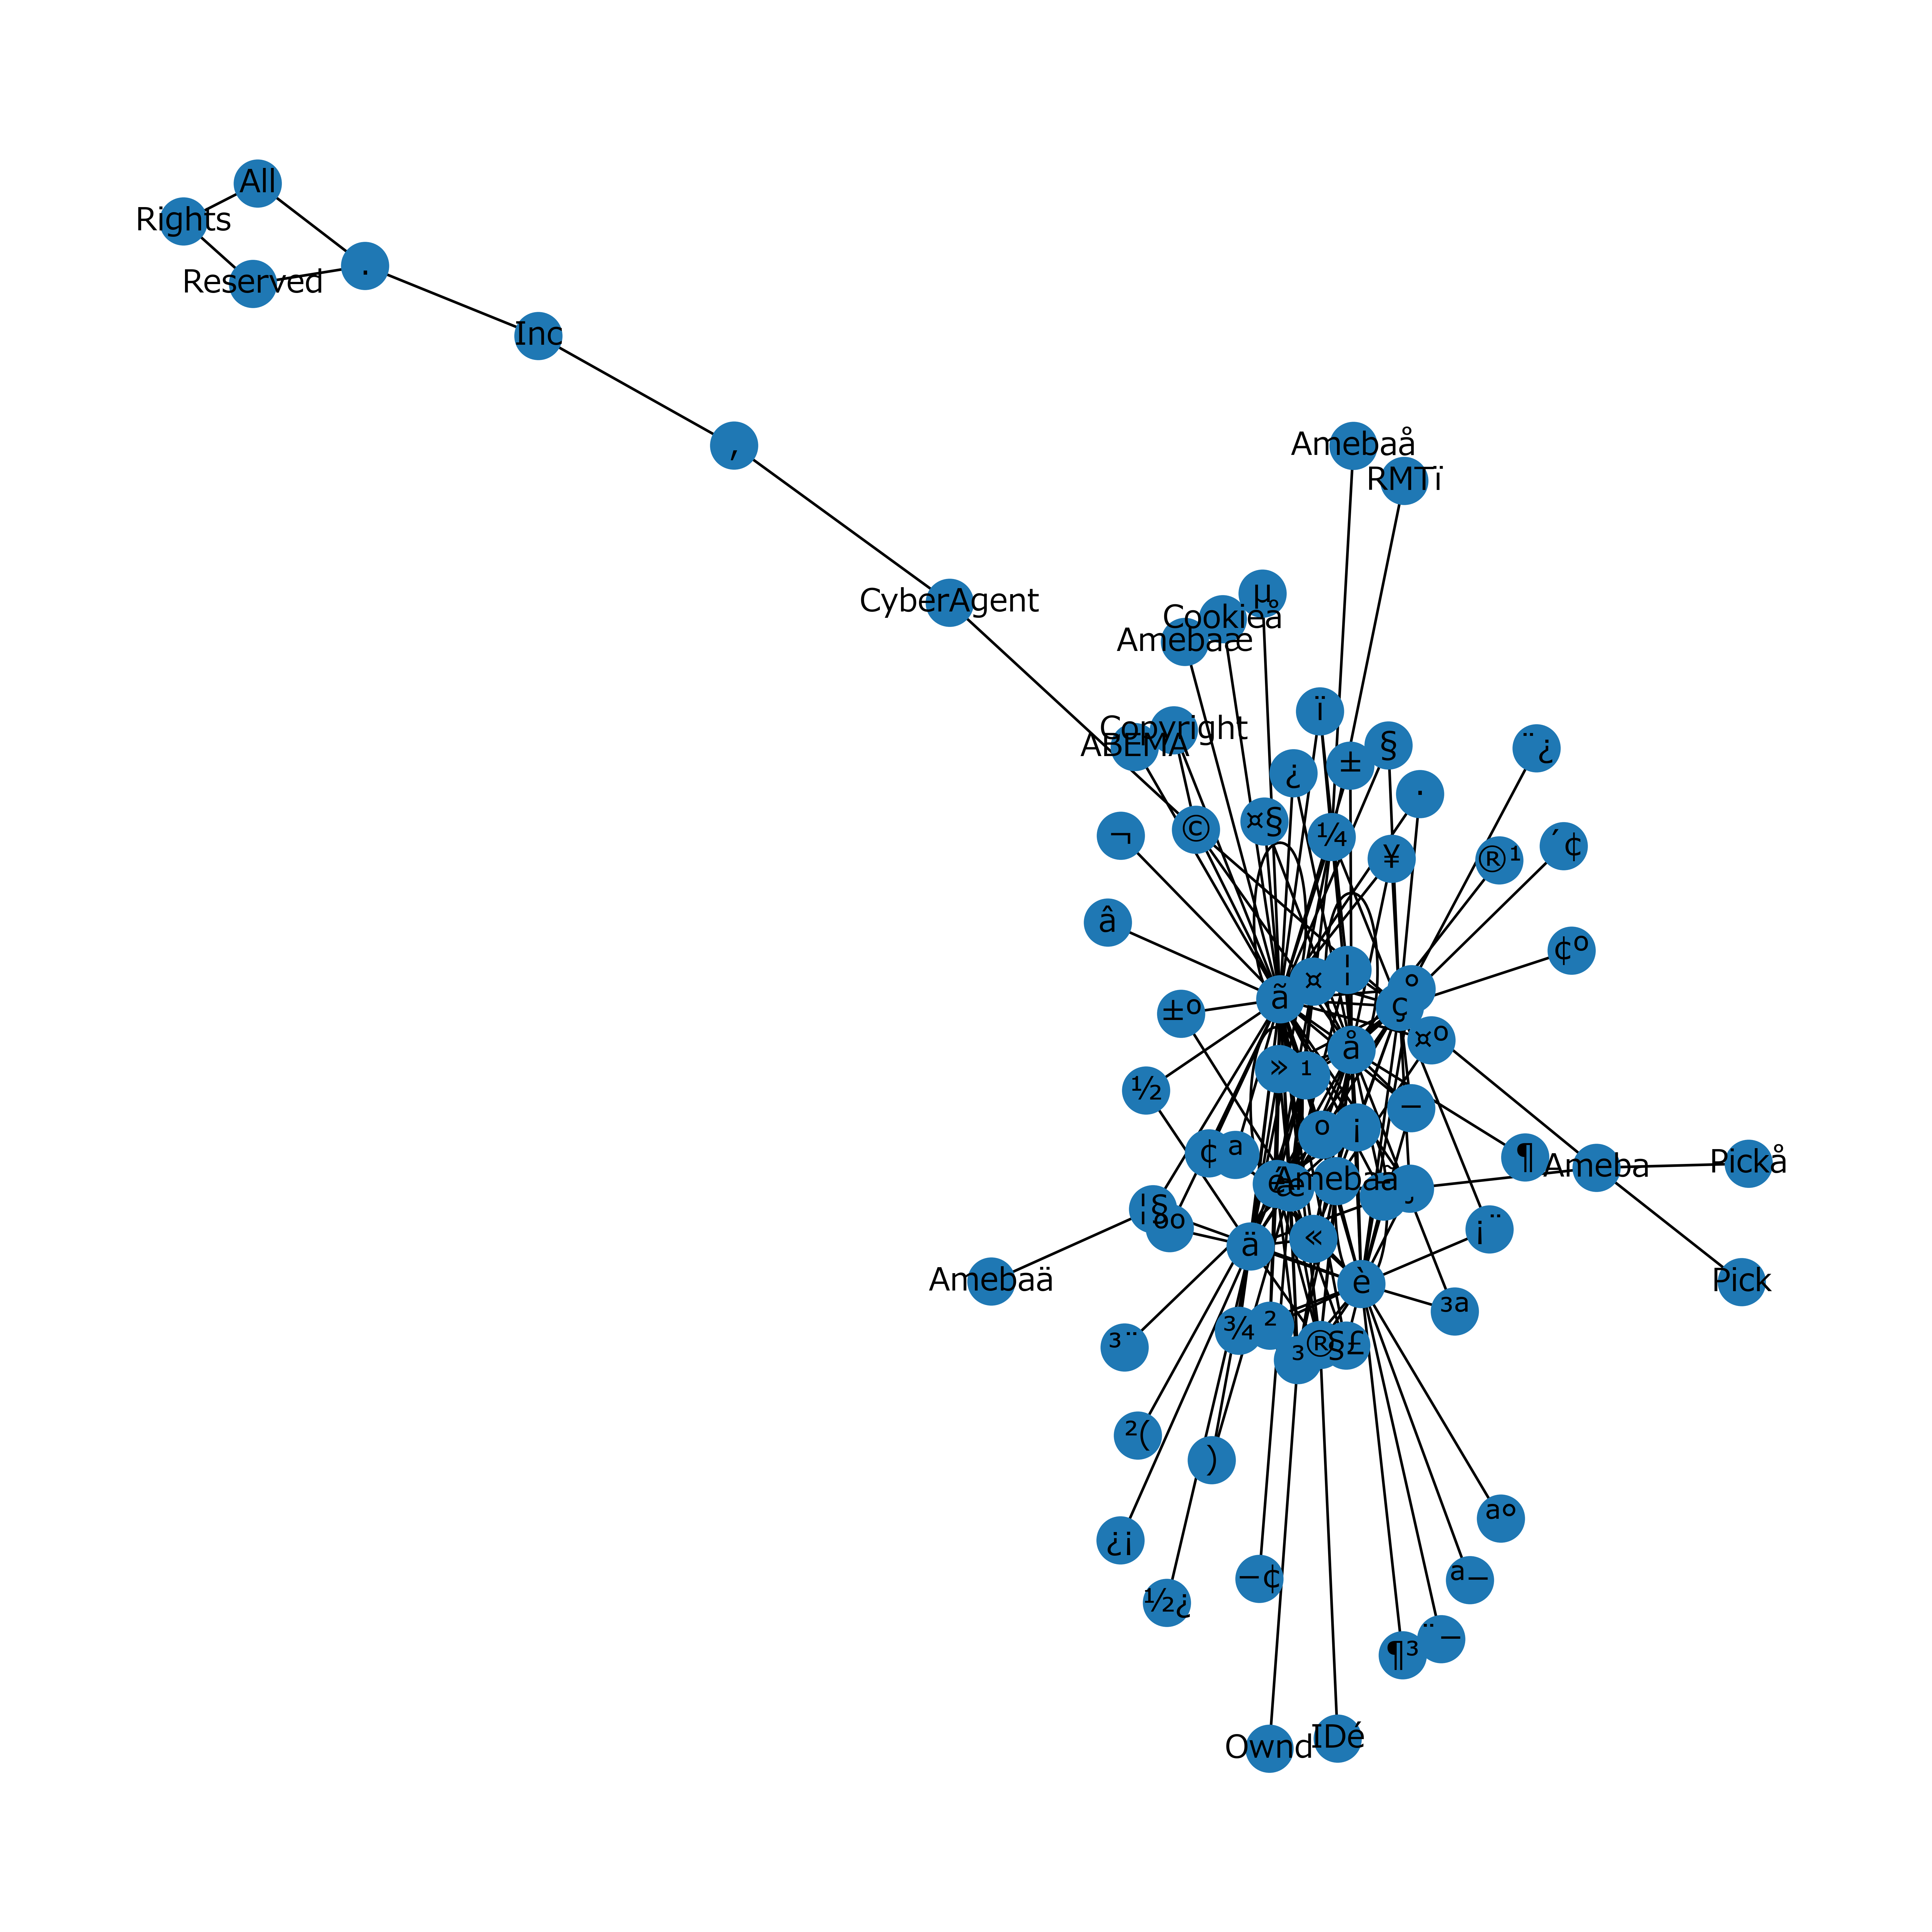

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams['font.family'] = 'Meiryo'



# 単語の出現回数をカウント
words_count = Counter()
for content in data['Content']:
    node = mecab.parseToNode(content)
    while node:
        features = node.feature.split(',')
        if features[0] in ['名詞', '動詞', '形容詞']:
            words_count[node.surface] += 1
        node = node.next

G = nx.Graph()

for content in data['Content']:
    node = mecab.parseToNode(content)
    words = []
    while node:
        features = node.feature.split(',')
        if features[0] in ['名詞', '動詞', '形容詞']:
            words.append(node.surface)
        node = node.next

# 出現回数が10回以上のワードだけを表示
for i in range(len(words) - 1):
    if words_count[words[i]] >= 10 and words_count[words[i + 1]] >= 1:
        G.add_edge(words[i], words[i + 1])

# ネットワークの描画
plt.figure(figsize=(10, 10), dpi=600)
nx.draw(G, with_labels=True, font_family='Meiryo')
plt.show()



# 感情プロット

In [26]:
!pip install textblob　

     -------------------------------------- 636.8/636.8 kB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00


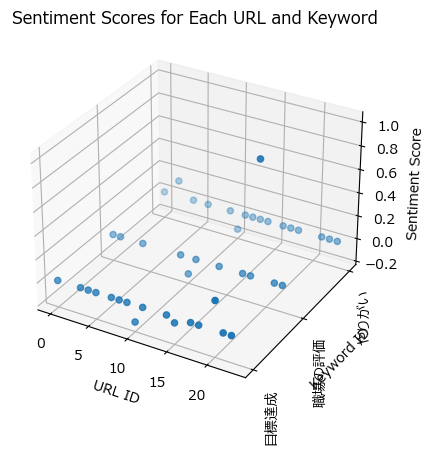

In [36]:
# URLとKeywordを一意のIDに変換
url_ids = {url: idx for idx, url in enumerate(set(data['URL']))}
keyword_ids = {keyword: idx for idx, keyword in enumerate(set(data['Keyword']))}

# URL, Keyword, 感情スコアのリストを作成
url_indices = []
keyword_indices = []
sentiment_scores = []
for url, keyword, content in zip(data['URL'], data['Keyword'], data['Content']):
    sentiment_score = TextBlob(content).sentiment.polarity
    url_indices.append(url_ids[url])
    keyword_indices.append(keyword_ids[keyword])
    sentiment_scores.append(sentiment_score)

# 3Dプロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(url_indices, keyword_indices, sentiment_scores)
plt.title('Sentiment Scores for Each URL and Keyword')
ax.set_xlabel('URL ID')
ax.set_ylabel('Keyword ID')
ax.set_zlabel('Sentiment Score')

# キーワードIDを日本語のキーワードに変換してラベルを設定
plt.yticks(list(keyword_ids.values()), list(keyword_ids.keys()), rotation=90)

plt.show()


# さらにグラフ

In [40]:
import MeCab
from collections import defaultdict
import pandas as pd

# Read the CSV file
file_path = "scraped_data.csv"
data = pd.read_csv(file_path)

# Initialize MeCab
mecab = MeCab.Tagger("-Ochasen")

# Define the keywords
keywords = ["目標", "達成"]

# Function to extract nouns and verbs from a sentence
def extract_nouns_verbs(sentence):
    nouns = []
    verbs = []
    parsed_text = mecab.parse(sentence)
    for line in parsed_text.split('\n'):
        elements = line.split('\t')
        if len(elements) >= 4:
            word_type = elements[3].split('-')[0]
            if word_type == "名詞":
                nouns.append(elements[0])
            elif word_type == "動詞":
                verbs.append(elements[0])
    return nouns, verbs

# Extract sentences containing the keywords
sentences_with_keywords = defaultdict(list)
for content in data['Content']:
    for sentence in str(content).split('.'):
        for keyword in keywords:
            if keyword in sentence:
                sentences_with_keywords[keyword].append(sentence.strip())

# Extract nouns and verbs for each keyword
nouns_verbs_by_keyword = defaultdict(lambda: {'nouns': [], 'verbs': []})
for keyword, sentences in sentences_with_keywords.items():
    for sentence in sentences:
        nouns, verbs = extract_nouns_verbs(sentence)
        nouns_verbs_by_keyword[keyword]['nouns'].extend(nouns)
        nouns_verbs_by_keyword[keyword]['verbs'].extend(verbs)

# Print the results
for key, value in nouns_verbs_by_keyword.items():
    print(f"For keyword '{key}':")
    print("Nouns:", value['nouns'])
    print("Verbs:", value['verbs'])
    print()


For keyword '目標':
Nouns: ['宮岡', '真由美', '心理', 'カウンセラー', '東京', 'オンライン', '夢', '実現', '目標', '達成', '自信', '・', '人', '苦手', '愛着', '障害', 'さ', '卒業', '宮岡', '真由美', '心理', 'カウンセラー', '東京', 'オンライン', '夢', '実現', '目標', '達成', '自信', '・', '人', '苦手', '愛着', '障害', 'さ', '卒業', 'ホームピグアメブロ', '芸能人', 'ブログ', '人気', 'ブログ', '新規', '登録', 'ログイン', '宮岡', '真由美', '心理', 'カウンセラー', '東京', 'オンライン', '夢', '実現', '目標', '達成', '自信', '・', '人', '苦手', '愛着', '障害', 'さ', '卒業', '長女', '気質', '悩み', '根本', '解決', '速', '夢', '私', '学校', 'プレシャスライフアカデミー', '自信', '自分', 'こと', '人', '苦手', '集団', '苦手', 'ビリーフチェンジ', 'アダルト', 'チルドレン', '不安', 'うつ', '改善', '自信', '自分', '嫌い', 'こと', '長女', '気質', '悩み', '根本', '解決', '不機嫌', '人生', '機嫌', '人生', '潜在', '意識', '味方', '速', '夢', '世界', '案内', '現在', '申し込み', '可能', '講座', '一覧', '講座', 'セミナー', 'お知らせ', '自己', '肯定', '感', '高め', '人間', '関係', '楽', 'ストレス', 'マネジメント', 'オンライン', '人生', '潜在', '意識', '書き換え', 'アカデミー', '2023', '年', '冬', '開講', '予定', '個人', 'セッション', 'メニュー', '個人', 'セッション', 'お客様', '声', '体験', '談', '質問', '人生', '潜在', '意識', '書き換え', 'アカデミー', 'ベーシック', 'お客様',

# クラスタリング分析

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# List of nouns for the keyword '目標'
nouns_target = ['ハッピー', '成長', '心理', 'やりがい', '自分', '成功', '夢', '実現', '目標', '達成', '自信', '探す', '人', '苦手', '愛着', '障害', 'さ', '卒業'] # Add all the nouns here

# Apply TF-IDF
vectorizer = TfidfVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform([[noun] for noun in nouns_target])

# Apply K-means clustering
kmeans = KMeans(n_clusters=5) # You can change the number of clusters
kmeans.fit(X)

# Get the cluster centers
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Print the top terms per cluster
for i in range(5): # Number of clusters
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]: # Top 10 terms in each cluster
        print(f" {terms[ind]}")
    print()



Cluster 0:
 障害
 達成
 やりがい
 人
 卒業
 夢
 実現
 心理
 さ
 成功

Cluster 1:
 ハッピー
 障害
 達成
 やりがい
 人
 卒業
 夢
 実現
 心理
 愛着

Cluster 2:
 成長
 障害
 心理
 やりがい
 ハッピー
 人
 卒業
 夢
 実現
 愛着

Cluster 3:
 目標
 障害
 心理
 やりがい
 ハッピー
 人
 卒業
 夢
 実現
 愛着

Cluster 4:
 愛着
 達成
 やりがい
 ハッピー
 人
 卒業
 夢
 実現
 心理
 障害



# 2次元プロット クラスタリング

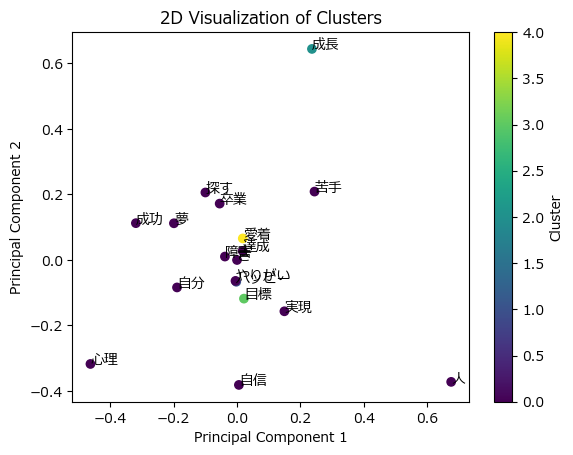

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Predict cluster labels for each noun
labels = kmeans.predict(X)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')

# Annotate the points with the corresponding nouns
for i, noun in enumerate(nouns_target):
    plt.annotate(noun, (reduced_features[i, 0], reduced_features[i, 1]))

plt.title('2D Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar().set_label('Cluster')
plt.show()
